<a href="https://colab.research.google.com/github/akhilts03/CS331_Assignment_ML/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn import datasets

# Mean Square Loss

In [4]:
loss_of_question_2=[]
class meanSqLossLayer:

    # P and Y are of the form n x 1 where n is the number of datapoints
    def __init__(self,P,Y):
        self.input=(P,Y)

    def forward(self):
        try:
            P, Y = self.input
            L = np.mean(np.square(P-Y))
            loss_of_question_2.append(L)
            # print(L)
            return L
        except:
            ValueError("Error in computation in forward pass of mean squared layer")

    def backward(self):
        self.forward()
        P, Y = self.input
        n = P.shape[0]
        delL_dely_hat = 2*(P-Y)/n   ## delL_dely_hat is of the form n x 1

        return delL_dely_hat


# Cross Entropy Layer

In [5]:
loss_of_question_3=[]
def one_hot_encode(matrix, num_classes):  # matrix input is of the form n x 1
    try:
        if num_classes == 1:
            return matrix
        s = set()
        for row in matrix:
            for element in row:
                s.add(element)
        if len(s) != num_classes:
            raise ValueError("Unique elements in matrix != num_classes")

        one_hot_matrix = np.eye(num_classes)[matrix.flatten().astype(int)]
        # print("hello of crossentropy_one_hot_ encoding")
        return one_hot_matrix   # output of form n x num_classes or n x k
    except Exception as e:
          print(e)



class CrossEntropyLossLayer:

    # in case of sigmoid Y_pred is of form n x 1 and Y_true is of form n x 1
    # for softmax Y_pred is of form n x k and Y_true is of the form n x 1
    def __init__(self, Y_pred, Y_true):
        # print("hello of crossentropy_init")
        self.Y_pred = Y_pred
        # print(Y_pred.shape)
        # print(Y_true)
        self.num_classes=self.Y_pred.shape[1]
        self.Y_true = one_hot_encode(Y_true,self.num_classes)

    def forward(self):

        try:

            # Y_new = one_hot_encode(self.Y_true,self.num_classes)
            loss = -np.sum(self.Y_true * np.log(self.Y_pred))   # loss is always a scalar
            loss_of_question_3.append(loss)
            # print("Loss=",loss)
            return loss

        except:
            ValueError("Error in cross entropy loss computation")

    def backward(self):
        self.forward()
        # Y_new = one_hot_encode(self.Y_true,self.num_classes)                     # performing one hot encoding on Y and converting it from nX1 to nXk

        try:
            # print(self.Y_pred)
            # reciprocal_matrix = np.reciprocal(self.Y_pred)        # finding 1/Y_cap
            dL_dY_hat = self.Y_true/self.Y_pred
            # print("hello of crossentropy_backward")
            return dL_dY_hat

            #for sigmopid and linear regression dL_dY_hat is of the form n x 1
            #for softmax dL_dy_hat is of the form n x k
        except Exception as e:
            print("cross entropy back prop dl_dyhat "+str(e))

# Softmax

In [6]:


class SoftMax:

    P=[]
    num_datapoints=0
    num_classes=0

    # P is of the shape n x k where n is number of datapoints and k is number of classes
    # Y is of the form n x  1
    def __init__(self,P,Y):
        self.P=P
        self.Y=Y
        self.num_datapoints=len(list(P))
        if(self.num_datapoints!=0):
            self.num_classes=len(list(list(P)[1]))

    def softmax(self,z):
        exp_array=np.exp(np.array(z))
        sum_array=np.sum(exp_array)

        try:
            y_hat=exp_array/sum_array
            return y_hat
        except:
            raise ValueError("Error in Y_hat computation of softmax")

    def forward_pass(self):       #forward pass function making use of the value received by the bias addition layer i.e. P
        y_hat=[]
        # print("hello from forward of softmax")
        try:
            for i in range(self.num_datapoints):
                y_hat_i=self.softmax(self.P[i])
                y_hat.append(y_hat_i)

            return y_hat        #y_hat is of the form n x k
        except Exception as e:
            print("softmax forward pass"+str(e))


    def backward_pass(self):
        try:
            #we can make use of the value of back pass of cross entropy layer
            y_hat=np.array(self.forward_pass())  #y_hat is of the form n x k
            delL_delY_hat=np.array(CrossEntropyLossLayer(y_hat,self.Y).backward())      #delL_delY_hat is n x k
            M=(delL_delY_hat @ y_hat.T)             # M is of the form n x n
            try:
                Md=M.diagonal().reshape((self.num_datapoints,1))    # Md is of the form n x 1
            except Exception as e:
                print("softmax backward pass Md diagonal thing"+str(e))

######################################
            try:
                delL_delP=(-y_hat)*(delL_delY_hat-Md)  #delL_delP is of the form n x k
            except Exception as e:
                print(e)
            # print("hello of softmax_backward")
            # k = y_hat.shape[1]
            # Y_new = one_hot_encode(self.Y,k)
            # delL_delP=y_hat-Y_new
######################################

            num_entries=len(list(y_hat))
            y_samp=np.zeros((num_entries,1))
            try:
                for i in range(num_entries):
                    y_samp[i]=np.argmax(y_hat[i])
            except Exception as e:
                print("softmax backward y_samp "+str(e))

            y_samp=y_samp.astype('int')
            # print(y_samp)
            # print(y_samp)

            return (delL_delP,y_samp)
        except:
            ValueError("error in backward pass calculation of softmax")






# Sigmoid

In [7]:

class Sigmoid:

    P=[]
    num_datapoints=0
    num_classes=0

    # Y is of the form n x 1
    def __init__(self,P,Y):
        self.P=P
        self.Y=Y
        self.num_datapoints=len(list(P))
        if(self.num_datapoints!=0):
            self.num_classes=len(list(list(P)[1]))

    def sigmoid(self,z):
        exp_array=np.exp(np.array(-z))

        try:
            y_hat=1/(1+exp_array)
            return y_hat
        except:
            ValueError("Error in Y_hat computation")

    def forward_pass(self):       #forward pass function making use of the value received by the bias addition layer i.e. P
        try:
            y_hat=[]
            for i in range(self.num_datapoints):
                y_hat_i=self.sigmoid(self.P[i])
                y_hat.append(y_hat_i)
            return y_hat        #y_hat of the shape n x 1 for sigmoid
        except:
            ValueError("error in forward pass calculation of sigmoid")


    def backward_pass(self):

        try:
            #we can make use of the value of back pass of cross entropy layer

            y_hat=np.array(self.forward_pass())
            delL_delY_hat=np.array(CrossEntropyLossLayer(y_hat,self.Y).backward())


            delL_delP=delL_delY_hat*y_hat*(1-y_hat)


            num_entries=len(list(y_hat))
            y_samp=np.zeros((num_entries,1))
            for i in range(num_entries):
                if(y_hat[i]>1-y_hat[i]):
                    y_samp[0][i]=0
                else:
                    y_samp[0][i]=1

            return (delL_delP,y_samp)        #then this is of the shape n x 1

        except:
            ValueError("error in backward pass calculation of sigmoid")






# Bias Addition Layer

In [8]:

class biasAddLayer:

    #N is of the shape n x 1 for sigmoid and linear regression
    #N is of the shape n x k for softmax where n is number of data points and k is number of classes
    def __init__(self, N,Y,algo_type,B):
        self.Y=Y
        self.algo_type=algo_type
        self.N = N
        self.B=B


    def forward(self):
        # print("hello of bias_additio_forward")
        try:
            # print(self.N)
            # print(self.B)
            # print(self.N + self.B.T)
            if(self.algo_type=='linear_regression'):
              return self.N+self.B
            return self.N + self.B.T
        except Exception as e:
            print("bias addition forward pass"+str(e))


        #for sigmoid and linear regression P of form n x 1
        # for softmax P is of shape n x k

    def backward(self):     #grad_out = del_L/del_P
        try:
            if(self.algo_type=='sigmoid'):
                # print("hello of bias_additio_backward_sigmoid")
                P=self.forward()
                delL_delP,y_hat=Sigmoid(P,self.Y).backward_pass()         #delL_delP received is of shape n x 1
                delL_delb = np.sum(delL_delP)
                delL_delN = delL_delP
                return (delL_delb,delL_delN,y_hat)   #del_L/del_b is scalar 1 delL_delN is of shape n x 1


            elif(self.algo_type=='softmax'):
                P=self.forward()
                delL_delP,y_hat=SoftMax(P,self.Y).backward_pass()  #delL_delP received is of shape n x k
                # print("hello of bias_additio_backward_softmax")
                delL_delb = np.array(np.sum(delL_delP,axis=0)).reshape((len(list(P)[1]),1))
                # print("deL_delb shape=",str(delL_delb.shape))

                delL_delN = delL_delP
                return (delL_delb,delL_delN,y_hat)   #del_L/del_b is of the shape k x 1 delL_delN is of shape n x k



            else:
                # print("hello of bias_additio_backward_linear_regression")
                P=self.forward()                    # P is of the shape n x 1
                delL_delP=meanSqLossLayer(P,self.Y).backward()    #delL_dely_hat is of the form n x 1
                delL_delb= np.sum(delL_delP)
                delL_delN = delL_delP
                return (delL_delb,delL_delN,P)   #del_L/del_b is scalar 1 delL_delN is of shape n x 1

        except:
            ValueError("Error in computation of grad out in bias addition layer from "+str(self.algo_type)+" layer.")







# Matrix Multiplication

In [9]:

class MatrixMultiplicationLayer:

    #X is dataset of the size n x d. n--> Number of datapoints, d number of features



    def __init__(self, X,labels,algo_type,iteration,W=[],B=[]):
        self.algo_type=algo_type
        self.X = X
        self.Y=labels
        self.y_hat=np.zeros(labels.shape)

        if(len(list(X))==0):
            ValueError("No entries found in the dataset.")



        if(iteration==0 or B==[]):
            if(self.algo_type=="linear_regression" or self.algo_type=="sigmoid"):
                self.B = 1                                            #sigmoid or linear regression B is scalar
            else:
                unique_elements, counts = np.unique(labels, return_counts=True)
                num_classes=len(unique_elements)
                self.B=np.ones((num_classes,1))          #softmax B is of shape k x 1

        else:
            self.B=B



        if(iteration==0 or W==[]):
            if(algo_type=='linear_regression' or algo_type=='sigmoid'):
                self.W=np.ones((1,X.shape[1]))                         # W is of the shape (1 x d)
            elif(algo_type=='softmax'):
                unique_elements, counts = np.unique(labels, return_counts=True)
                num_classes=len(unique_elements)
                self.W=np.ones((num_classes,X.shape[1]))               # W is of the shape (k x d) where k is the number of classes

        else:
            self.W=W

        # print("hi")
        # print(self.W,self.B)

    def set_param(self,W,B):
        self.W=W
        self.B=B

    def forward(self):
        try:
            # Linear Regression and Sigmoid N is of shape n x 1
            # Softmax N is of shape n x k

            N = self.X @ self.W.T
            return N
        except:
            ValueError("Error in computation of forward pass of Matrix Multiplication Layer")

    def backward(self):
        try:
            # print(self.W)
            N=self.forward()


            ###########################################

            #sigmoid and linear regression del_L/del_b is scalar delL_delN is of shape n x 1
            #softmax del_L/del_b is of the shape k x 1 delL_delN is of shape n x k
            dL_db,dL_dN,y_hat=biasAddLayer(N,self.Y,self.algo_type,self.B).backward()
            # print("hello of matrix mult")

            self.y_hat=y_hat
            dL_dW = self.X.T @ dL_dN
            # k = y_hat.shape[1]
            # Y_new = one_hot_encode(self.Y,k)
            # Y_hat_new=one_hot_encode(y_hat,k)
            # # delL_delP=y_hat-Y_new
            # dL_dW = self.X.T @ (Y_hat_new-Y_new)

            #sigmoid dL_dW is of the form d x 1
            #softmax dL_dW is of the form d x k
            return (dL_dW,dL_db)
        except:
            ValueError("Error in computation of backward pass of Matrix Multiplication Layer")


    def predictions(self):
        return self.y_hat

    def parameters(self):
        return (self.W,self.B)

# Question 2

## Using California Housing Prices

In [10]:
dataset,labels=datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=True, as_frame=False)

In [11]:
print("Dataset Shape="+str(dataset.shape))
print("Labels Shape="+str(labels.shape))

Dataset Shape=(20640, 8)
Labels Shape=(20640,)


In [12]:
for i in range(len(list(dataset))):
  # print(dataset[i])
  dataset[i]=dataset[i]/np.max(dataset[i])

In [13]:
#seperating the test data and the training data
np.random.seed(2020)
indices = np.random.permutation(len(list(dataset)))

dataset = dataset[indices]
labels = labels[indices]


split_point = int(0.8 * len(list(dataset)))  #including 80% in the training data and remaining 20% in the test data

train_data=dataset[:split_point]
train_labels=labels[:split_point]

test_data=dataset[split_point:]
test_labels=labels[split_point:]

print("Train data shape="+str(train_data.shape))
print("Test data shape="+str(test_data.shape))

Train data shape=(16512, 8)
Test data shape=(4128, 8)


In [14]:
#the gradient descent algorithm for learning
def gradient_descent(w,b,delL_delw,delL_delb,learning_rate):
    # print("old w and b shape",str(w.shape),str(b.shape))
    W=w-learning_rate*(delL_delw.T)
    B=b-learning_rate*(delL_delb)
    # print("new w and b shape",str(W.shape),str(B.shape))
    return (W,B)

def accuracy(Y_hat,Y):
    try:
        return (np.count_nonzero(np.array(Y_hat) == np.array(Y))*1.0/len(list(Y)))
    except Exception as e:
        print("accuracy function "+str(e))

In [15]:
learning_rate=0.01
epochs=10

In [16]:
batch_size=1

In [17]:
import math

In [18]:
print("")
# W=np.ones((len(list(train_data)[1]),1))
# B=1
loss=[]

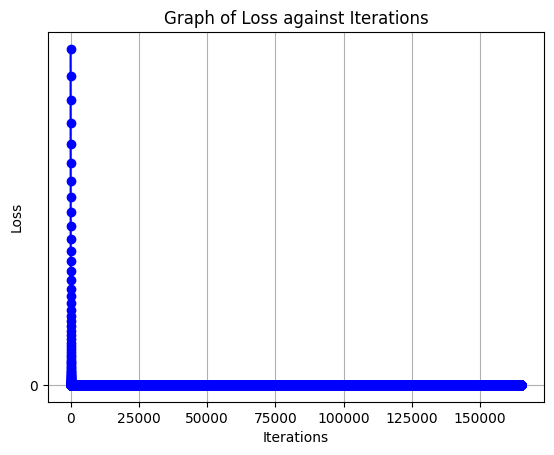

In [19]:

for i in range(epochs):
    num_iterations=math.ceil(len(list(train_data))/batch_size)

    # prediction=[]
    for j in range(num_iterations):
      start=j*batch_size
      end=(j+1)*batch_size

      if(end>=len(list(train_data))-1):
          sample_data=train_data[start:]
          sample_labels=train_labels[start:]

      else:
          sample_data=train_data[start:end]
          sample_labels=train_labels[start:end]


#       P=sample_data @ W + B
#       l+=np.square(P-sample_labels)[0][0]/len(list(train_data))
#       dw=np.dot(sample_data.T,2*(P-sample_labels))
#       db=np.sum(2*(P-sample_labels))
#       # print(dw)
#       # print(l)
#       W=W-(0.01*dw)
#       B=B-(0.01*db)

#     loss.append(l)


# loss=loss[1:]
      if(i+j==0):
          # print("hello")
          model=MatrixMultiplicationLayer(sample_data,sample_labels,'linear_regression',0)
      # else:
      #     model=MatrixMultiplicationLayer(sample_data,sample_labels,'linear_regression',i+j,w,b)
      # print("start=",start)
      dL_dw,dL_db=model.backward()
      # print("dL_dw=",dL_dw,' dL_db=',dL_db)
      y_hat=model.predictions()
      # prediction.extend(y_hat)
      w,b=model.parameters()
      w,b=gradient_descent(w,b,dL_dw,dL_db,learning_rate)
      model.set_param(w,b)

      # print(prediction)


#####################################################GRAPHS##########################################################
# loss_of_question_2=loss_of_question_2[::len(train_data)]
import matplotlib.pyplot as plt
indices = np.arange(len(loss_of_question_2))

# Plot the data
plt.plot(indices, loss_of_question_2, marker='o', linestyle='-', color='b', label='Data')

# Set grid lines at intervals of 0.05
plt.yticks(np.arange(0, max(loss_of_question_2)+0.1, 0.5))

plt.grid(True)

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Graph of Loss against Iterations')

loss_of_question_2=[]

In [20]:
# import matplotlib.pyplot as plt


# # Plotting the list against its index
# plt.plot(loss[1:])

# # Adding labels and title
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.title('Graph of List against Index')

# # Display the plot
# plt.show()

In [21]:
# print("Test Data stats")
# l=0
# for j in range(len(list(test_data))):
#   P=test_data[j] @ W + B
#   l+=np.sum(np.square(P-test_labels[j]))/len(list(test_data))

# print("Loss on test set=",l)

In [22]:
print("")

new_model=MatrixMultiplicationLayer(test_data,test_labels,'linear_regression',99999,w,b)
# print(w,b)
dL_dw,dL_db=new_model.backward()
print("Test Data stats")
print("Loss=>",loss_of_question_2[0])
# prediction=new_model.predictions()
# print("Test Data Accuracy="+str(accuracy(prediction,test_labels)))

<ipython-input-9-4e2ab0e05d3e>:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if(iteration==0 or B==[]):


ValueError: operands could not be broadcast together with shapes (1,8) (0,) 

# Question 3


Dataset Shape=(150, 4)
Labels Shape=(150, 1)

Train data shape=(105, 4)
Test data shape=(45, 4)

Accuracy=0.37142857142857144
Accuracy=0.7904761904761904
Accuracy=0.7904761904761904
Accuracy=0.7904761904761904
Accuracy=0.7904761904761904
Accuracy=0.8
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.819047619047619
Accuracy=0.819047619047619
Accuracy=0.819047619047619
Accuracy=0.819047619047619
Accuracy=0.819047619047619
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.8095238095238095
Accuracy=0.819047619047619
Accuracy=0.819047619047619
Accuracy=0.819047619047619
Accuracy=0.819047619047619
Accuracy=0.819047619047619
Acc

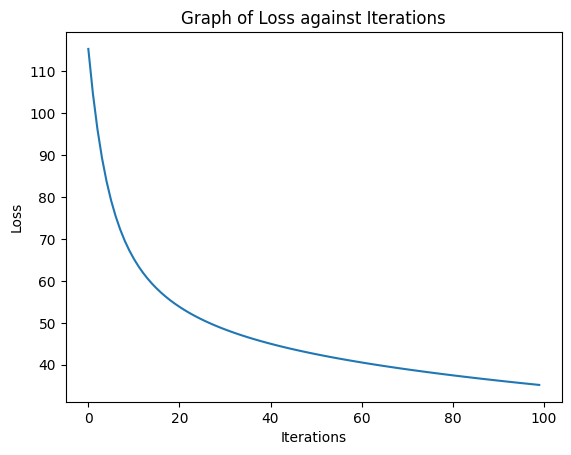

In [23]:
from sklearn import datasets

from sklearn.preprocessing import StandardScaler


scalar=StandardScaler()

#initializing the dataset
iris = datasets.load_iris()

dataset=scalar.fit_transform(np.array(iris.data))
labels=np.array(iris.target).reshape((iris.target.shape[0],1))

print("Dataset Shape="+str(dataset.shape))
print("Labels Shape="+str(labels.shape))
print("")


#seperating the test data and the training data
np.random.seed(2020)
indices = np.random.permutation(len(list(dataset)))

dataset = dataset[indices]
labels = labels[indices]


split_point = int(0.7 * len(list(dataset)))  #including 70% in the training data and remaining 30% in the test data

train_data=dataset[:split_point]
train_labels=labels[:split_point]

test_data=dataset[split_point:]
test_labels=labels[split_point:]

print("Train data shape="+str(train_data.shape))
print("Test data shape="+str(test_data.shape))



#the gradient descent algorithm for learning
def gradient_descent(w,b,delL_delw,delL_delb,learning_rate):
    # print("old w and b shape",str(w.shape),str(b.shape))
    W=w-learning_rate*(delL_delw.T)
    B=b-learning_rate*(delL_delb)
    # print("new w and b shape",str(W.shape),str(B.shape))
    return (W,B)

def accuracy(Y_hat,Y):
    try:
        return (np.count_nonzero(np.array(Y_hat) == np.array(Y))*1.0/len(list(Y)))
    except Exception as e:
        print("accuracy function "+str(e))

learning_rate=0.001
iterations=100

model=MatrixMultiplicationLayer(train_data,train_labels,'softmax',0)

print("")

##################################################################################################33
for i in range(iterations):

    ##################################################################################333
    dL_dw,dL_db=model.backward()
    prediction=model.predictions()
    w,b=model.parameters()
    # print(w)
    print("Accuracy="+str(accuracy(prediction,train_labels)))
    w,b=gradient_descent(w,b,dL_dw,dL_db,learning_rate)
    # print(w,b)
    # print(w)
    model.set_param(w,b)
    # print("True labels=")
    # print(train_labels)
    # model=MatrixMultiplicationLayer(train_data,train_labels,'softmax',w,b)

    #####################################################################################################
###############################################################################################################3

plt.plot(loss_of_question_3)

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Graph of Loss against Iterations')

loss_of_question_3=[]



In [24]:
print("")
print("Test Data stats")
new_model=MatrixMultiplicationLayer(test_data,test_labels,'softmax',9999,w,b)
# print(w,b)
dL_dw,dL_db=new_model.backward()
prediction=new_model.predictions()
print("Test Data Accuracy="+str(accuracy(prediction,test_labels)))


Test Data stats


<ipython-input-9-4e2ab0e05d3e>:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if(iteration==0 or B==[]):


ValueError: operands could not be broadcast together with shapes (3,4) (0,) 